In [6]:
from river import drift
from drift_runner.utils import get_paths
from stream_generator import FeatureImportanceChangeGenerator
from drift_runner.drift_runner import DriftDetectionRunner
from drift_runner.utils import plot_all_strategies
import warnings
warnings.filterwarnings('ignore')


## loop

In [7]:
# drift_detectors = {
#     'adwin': drift.ADWIN(),
#     'kswin': drift.KSWIN()
# }

# n_histories = [1000, 2000]
# strategies = ['all_features_no_reset', 'all_features_with_reset', 'boruta_initial_only', 'boruta_dynamic', 'alpha_dynamic']
# feature_selectors = ['boruta', 'alpha']

In [8]:
# seed = 160
# n_features = 20
# n_important_features = 5
# importance_change_interval = 10

In [9]:
# for detector in drift_detectors:
#     for strategy in strategies:
#         feature_selector = strategy.split('_')[0]
#         feature_selector = feature_selector if feature_selector in ['boruta', 'alpha'] else None
#         if strategy in ['boruta_initial_only', 'boruta_dynamic', 'alpha_dynamic']:
#             for n_history in n_histories:
#                 plot_path, export_path = get_paths(detector, seed, n_history, strategy)
                
#                 generator = FeatureImportanceChangeGenerator(n_features=n_features, n_important_features=n_important_features, importance_change_interval=importance_change_interval, random_seed=seed)
#                 runner = DriftDetectionRunner(generator, drift_detectors[detector], feature_selector, n_history=n_history, plot_path=plot_path, export_path=export_path, print_plot=False)
#                 runner.run(mode=strategy)
#         else:
#             n_history = 1
#             plot_path, export_path = get_paths(detector, seed, n_history, strategy)
            
#             generator = FeatureImportanceChangeGenerator(n_features=n_features, n_important_features=n_important_features, importance_change_interval=importance_change_interval, random_seed=seed)
#             runner = DriftDetectionRunner(generator, drift_detectors[detector], feature_selector, n_history=n_history, plot_path=plot_path, export_path=export_path, print_plot=False)
#             runner.run(mode=strategy)
                

## single

Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 0, Accuracy: 0.00%
[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 864
[Main] Drift detected at index 864
[Sensitive] Finalizing warning-phase collection. Epoch 864
Drift detected at epoch 864 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1000, Accuracy: 88.29%
[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 1889
[Main] Drift detected at index 1921
[Sensitive] Finalizing warning-phase collection. Epoch 1921
Drift detected at epoch 1921 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2000, Accuracy: 85.99%
[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 2690
[Main] Drift detected at index 2722
[Sensitive] Finalizing warning-phase collection. Epoch 2722
Drift detected at epoch 2722 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3000, Accuracy: 79.75%
[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 3171
Epoch 4000, Accuracy: 78.08%
[Main] Drift detected at index 4259
[Sensitive] Finalizing warning-phase collection. Epoch 4259
Drift detected at epoch 4259 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 4388
Epoch 5000, Accuracy: 78.58%
[Main] Drift detected at index 5220
[Sensitive] Finalizing warning-phase collection. Epoch 5220
Drift detected at epoch 5220 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 5413
[Main] Drift detected at index 5893
[Sensitive] Finalizing warning-phase collection. Epoch 5893
Drift detected at epoch 5893 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 5926
Epoch 6000, Accuracy: 79.28%
Epoch 7000, Accuracy: 79.02%
[Main] Drift detected at index 7174
[Sensitive] Finalizing warning-phase collection. Epoch 7174
Drift detected at epoch 7174 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

[Main] Drift detected at index 7975
Drift detected at epoch 7975 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8000, Accuracy: 79.13%
[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 8360
Epoch 9000, Accuracy: 79.18%
[Main] Drift detected at index 9352
[Sensitive] Finalizing warning-phase collection. Epoch 9352
Drift detected at epoch 9352 → updating features and resetting model


Boruta trials:   0%|          | 0/30 [00:00<?, ?it/s]

[Sensitive] Simulated warning: sensitive ADWIN detected early drift at epoch 9609


           Precision   Recall   F1       Support  
                                                  
       0      80.52%   77.17%   78.81%      4955  
       1      78.00%   81.26%   79.60%      4935  
                                                  
   Macro      79.26%   79.22%   79.20%            
   Micro      79.21%   79.21%   79.21%            
Weighted      79.26%   79.21%   79.20%            

                 79.21% accuracy                  
Plot saved to ./plots/adwin/160_seed/2000_window/boruta_dynamic.png


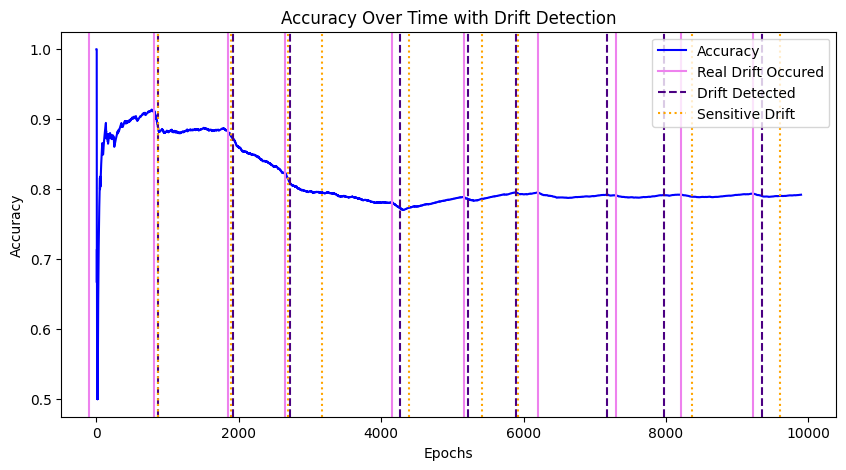

Run data exported to ./logs/adwin/160_seed/2000_window/boruta_dynamic.json


In [10]:
strategy = 'boruta_dynamic'
n_history = 2000
seed = 160
feature_selector = 'boruta'
chosen_detector = 'adwin'

generator = FeatureImportanceChangeGenerator(n_features=20, n_important_features=5, importance_change_interval=10, random_seed=seed)

plot_path, export_path = get_paths(chosen_detector, seed, n_history, strategy)

main_adwin = drift.ADWIN(delta=0.002)
sensitive_adwin = drift.ADWIN(delta=0.02)

runner = DriftDetectionRunner(
    generator=generator,
    drift_detector=main_adwin,
    sensitive_drift_detector=sensitive_adwin,
    feature_selector=feature_selector,
    n_history=2000,
    plot_path=plot_path,
    export_path=export_path,
    print_plot=True
    
)
runner.run(mode=strategy)

# runner = DriftDetectionRunner(generator, drift.ADWIN(), feature_selector, n_history=2000, plot_path=plot_path, export_path=export_path)
# runner.run(mode=strategy)

In [11]:
# strategies = [
#     'all_features_no_reset',
#     'all_features_with_reset',
#     'boruta_initial_only',
#     'boruta_dynamic',
#     'alpha_dynamic'
# ]



# detector = 'adwin'
# seed = 160
# window = 1000


# plot_all_strategies(detector, seed, window, strategies)